In [58]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import xgboost as xgb
from scipy.stats import chi2_contingency,pearsonr, kendalltau
from statsmodels.discrete.discrete_model import MNLogit
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, roc_auc_score,confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,classification_report
from sklearn.cluster import KMeans
from scipy.stats import chi2_contingency

# Importing the data

In [59]:
data = pd.read_csv(r'C:\Users\Nahom\Desktop\for final submission.csv')

In [60]:
data.head()

,Response Type,Progress,Duration (in seconds),Recorded Date,Response ID,Distribution Channel,User Language,Random ID,What is your age?,What is your gender?,...,How productive are you with working remotely?,Do you feel you are able to save money with remote work?,How satisfied are you with your current work-life balance?,How important do you think meeting with co-workers in person is compared to online?,Do you think there are more job opportunities with remote work?,Would you take a pay cut to work remotely?,"If yes, how much of a pay cut would you take?","In your opinion, how well does remote work align with your work preferences?","Ideally, with a five-day work week, on average how many days a week would you prefer to work remote (with other days being on site)?",Is there anything else that you wish to share related to remote work?
0,IP Address,100,123,10/16/2023 1:22,R_2QWzIQLEZ9e3hR4,anonymous,EN,1449,20,Female,...,Less productive,No,Neither satisfied nor dissatisfied,Slightly important,Yes,Yes,Less than 5%,Not very well,2 days,I like it for doing this in M Turk
1,IP Address,100,85,10/16/2023 1:25,R_3k5iJpHO8rY9wg1,social,EN,1510,24,Female,...,NaN,NaN,Neither satisfied nor dissatisfied,Important,Yes,No,NaN,Not very well,2 days,Good job. I appreciate it
2,IP Address,100,46,10/16/2023 1:27,R_1g54ct3mST0oHmC,anonymous,EN,1465,25,Female,...,Extremely productive,Yes,Extremely satisfied,Extremely important,Yes,Yes,5-10%,Very well,1 day,GOOD
3,IP Address,100,71,10/16/2023 1:27,R_2z7JW9Su4QK8TaX,anonymous,EN,1784,28,Male,...,Very productive,Yes,Satisfied,Extremely important,Yes,Yes,More than 15%,Extremely well,5 days,No comments
4,IP Address,100,77,10/16/2023 1:27,R_2dvjf9faW4NFsxi,anonymous,EN,1733,24,Female,...,Productive,Yes,Satisfied,Important,Yes,Yes,5-10%,Neutral,2 days,NaN


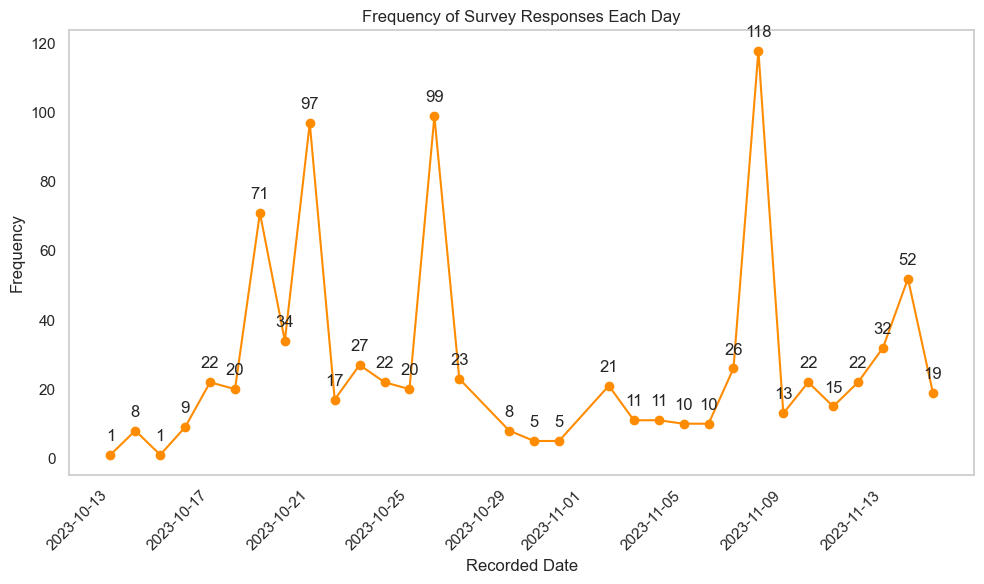

In [61]:
data['Recorded Date'] = pd.to_datetime(data['Recorded Date'])

daily_counts = data.groupby(data['Recorded Date'].dt.date).size()

plt.figure(figsize=(10, 6))
line_plot, = plt.plot(daily_counts.index, daily_counts, marker='o', linestyle='-', color='darkorange')

for i, txt in enumerate(daily_counts):
    plt.annotate(txt, (daily_counts.index[i], daily_counts[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Frequency of Survey Responses Each Day')
plt.xlabel('Recorded Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.grid(False)
plt.show()

In [62]:
data = data.drop('Response Type',axis=1)

data = data.drop('Progress',axis=1)

data = data.drop('Duration (in seconds)',axis=1)

data = data.drop('Recorded Date',axis=1)

data = data.drop('Response ID',axis=1)

data = data.drop('Distribution Channel',axis=1)

data = data.drop('User Language',axis=1)

data = data.drop('Is there anything else that you wish to share related to remote work?',axis=1)

In [63]:
data.head()

,Random ID,What is your age?,What is your gender?,Which of the following best describes your current occupation?,Do you live in the same city as your office?,"If yes, how far is your workplace from your residence?",How many years of experience do you have in your current job role or profession?,"How many children, under 12, do you have living with you?","On average, how many hours do you work per day?","On average, how many hours do you spend with family/friends per day?",...,Do you feel working from home has affected your professional growth?,How productive are you with working remotely?,Do you feel you are able to save money with remote work?,How satisfied are you with your current work-life balance?,How important do you think meeting with co-workers in person is compared to online?,Do you think there are more job opportunities with remote work?,Would you take a pay cut to work remotely?,"If yes, how much of a pay cut would you take?","In your opinion, how well does remote work align with your work preferences?","Ideally, with a five-day work week, on average how many days a week would you prefer to work remote (with other days being on site)?"
0,1449,20,Female,Education,No,NaN,2-3 years,None,Less than 8 hours,1 hour,...,Yes,Less productive,No,Neither satisfied nor dissatisfied,Slightly important,Yes,Yes,Less than 5%,Not very well,2 days
1,1510,24,Female,Business,No,NaN,2-3 years,One,Less than 8 hours,1 hour,...,NaN,NaN,NaN,Neither satisfied nor dissatisfied,Important,Yes,No,NaN,Not very well,2 days
2,1465,25,Female,Business,Yes,1-5 miles,2-3 years,One,8 hours,1 hour,...,Yes,Extremely productive,Yes,Extremely satisfied,Extremely important,Yes,Yes,5-10%,Very well,1 day
3,1784,28,Male,Business,Yes,6-10 miles,7-10 years,Two,More than 8 hours,3 or more hours,...,Yes,Very productive,Yes,Satisfied,Extremely important,Yes,Yes,More than 15%,Extremely well,5 days
4,1733,24,Female,Business,Yes,1-5 miles,2-3 years,Two,Less than 8 hours,1 hour,...,Yes,Productive,Yes,Satisfied,Important,Yes,Yes,5-10%,Neutral,2 days


## Renaming the Columns

In [64]:
data.rename(columns={"What is your age?":'Age'},inplace = True)
data.rename(columns={"What is your gender?":'Gender'},inplace = True)
data.rename(columns={"Which of the following best describes your current occupation?":"Occupation"},inplace = True)
data.rename(columns={'Do you live in the same city as your office?': 'Location'}, inplace = True)
data.rename(columns = {'If yes, how far is your workplace from your residence?': 'Workplace distance'}, inplace = True)
data.rename(columns={'How many years of experience do you have in your current job role or profession?': 'Experience'}, inplace=True)
data.rename(columns = {'How many children, under 12, do you have living with you?':'Children_under12'},inplace = True)
data.rename(columns = {'On average, how many hours do you work per day?':'Hours_worked'},inplace = True)
data.rename(columns = {'On average, how many hours do you spend with family/friends per day?':'Leisure_time_per_day'},inplace = True)
data.rename(columns = {'On average, how many hours of sleep do you get per day?':'Hours_of_sleep'},inplace = True)
data.rename(columns = {'Do you engage in remote work, even if only occasionally?':'Remote_work_frequency'},inplace = True)
data.rename(columns = {'How stressful is your job since your remote work began?':'Job_stress(Remote)'},inplace = True)
data.rename(columns = {'Do you feel working from home has affected your professional growth?':'Profession_impact'},inplace = True)
data.rename(columns = {'How productive are you with working remotely?':'Remotework_Productivity'},inplace = True)
data.rename(columns = {'Do you feel you are able to save money with remote work?':'Remotework_Savings'},inplace = True)
data.rename(columns = {'How satisfied are you with your current work-life balance?':'Work-Life balance satisfaction'},inplace = True)
data.rename(columns = {'How important do you think meeting with co-workers in person is compared to online?':'Inperson_meeting_importance'},inplace = True)
data.rename(columns = {'Do you think there are more job opportunities with remote work?':'Remote_Work_Opportunities'},inplace = True)
data.rename(columns = {'Would you take a pay cut to work remotely?':'Pay_cut_for_remotework'},inplace = True)
data.rename(columns = {'If yes, how much of a pay cut would you take?':'Pay_cut_Amount'},inplace = True)
data.rename(columns = {'In your opinion, how well does remote work align with your work preferences?':'Remote_work_fit'},inplace = True)
data.rename(columns= {'Ideally, with a five-day work week, on average how many days a week would you prefer to work remote (with other days being on site)?':'Days_to_work_remotely'},inplace = True)

data.head()

,Random ID,Age,Gender,Occupation,Location,Workplace distance,Experience,Children_under12,Hours_worked,Leisure_time_per_day,...,Profession_impact,Remotework_Productivity,Remotework_Savings,Work-Life balance satisfaction,Inperson_meeting_importance,Remote_Work_Opportunities,Pay_cut_for_remotework,Pay_cut_Amount,Remote_work_fit,Days_to_work_remotely
0,1449,20,Female,Education,No,NaN,2-3 years,None,Less than 8 hours,1 hour,...,Yes,Less productive,No,Neither satisfied nor dissatisfied,Slightly important,Yes,Yes,Less than 5%,Not very well,2 days
1,1510,24,Female,Business,No,NaN,2-3 years,One,Less than 8 hours,1 hour,...,NaN,NaN,NaN,Neither satisfied nor dissatisfied,Important,Yes,No,NaN,Not very well,2 days
2,1465,25,Female,Business,Yes,1-5 miles,2-3 years,One,8 hours,1 hour,...,Yes,Extremely productive,Yes,Extremely satisfied,Extremely important,Yes,Yes,5-10%,Very well,1 day
3,1784,28,Male,Business,Yes,6-10 miles,7-10 years,Two,More than 8 hours,3 or more hours,...,Yes,Very productive,Yes,Satisfied,Extremely important,Yes,Yes,More than 15%,Extremely well,5 days
4,1733,24,Female,Business,Yes,1-5 miles,2-3 years,Two,Less than 8 hours,1 hour,...,Yes,Productive,Yes,Satisfied,Important,Yes,Yes,5-10%,Neutral,2 days


# Descriptive Analytics

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871 entries, 0 to 870
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Random ID                       871 non-null    int64 
 1   Age                             871 non-null    int64 
 2   Gender                          871 non-null    object
 3   Occupation                      871 non-null    object
 4   Location                        871 non-null    object
 5   Workplace distance              804 non-null    object
 6   Experience                      871 non-null    object
 7   Children_under12                871 non-null    object
 8   Hours_worked                    871 non-null    object
 9   Leisure_time_per_day            871 non-null    object
 10  Hours_of_sleep                  871 non-null    object
 11  Remote_work_frequency           871 non-null    object
 12  Job_stress(Remote)              776 non-null    ob

In [66]:
data.shape

(871, 23)

In [67]:
#Filling the empty values
data = data.fillna('N/A')
data.head()

,Random ID,Age,Gender,Occupation,Location,Workplace distance,Experience,Children_under12,Hours_worked,Leisure_time_per_day,...,Profession_impact,Remotework_Productivity,Remotework_Savings,Work-Life balance satisfaction,Inperson_meeting_importance,Remote_Work_Opportunities,Pay_cut_for_remotework,Pay_cut_Amount,Remote_work_fit,Days_to_work_remotely
0,1449,20,Female,Education,No,N/A,2-3 years,None,Less than 8 hours,1 hour,...,Yes,Less productive,No,Neither satisfied nor dissatisfied,Slightly important,Yes,Yes,Less than 5%,Not very well,2 days
1,1510,24,Female,Business,No,N/A,2-3 years,One,Less than 8 hours,1 hour,...,N/A,N/A,N/A,Neither satisfied nor dissatisfied,Important,Yes,No,N/A,Not very well,2 days
2,1465,25,Female,Business,Yes,1-5 miles,2-3 years,One,8 hours,1 hour,...,Yes,Extremely productive,Yes,Extremely satisfied,Extremely important,Yes,Yes,5-10%,Very well,1 day
3,1784,28,Male,Business,Yes,6-10 miles,7-10 years,Two,More than 8 hours,3 or more hours,...,Yes,Very productive,Yes,Satisfied,Extremely important,Yes,Yes,More than 15%,Extremely well,5 days
4,1733,24,Female,Business,Yes,1-5 miles,2-3 years,Two,Less than 8 hours,1 hour,...,Yes,Productive,Yes,Satisfied,Important,Yes,Yes,5-10%,Neutral,2 days


In [68]:
#Identifying the range of values or unique values in each column 
#excluding the Random ID column using (data.columns[1:])
for column in data.columns[1:]:
    unique_values = data[column].unique()
    print(unique_values)

[20 24 25 28 34 32 45 42 27 48 26 22 33 35 41 52 23 29 21 37 31 36 63 40
 50 54 44 46 57 60 55 30 53 47 38 58 43 39 51 49 56 62 67 59 64]
['Female' 'Male']
['Education' 'Business' 'Engineering' 'IT-related' 'Other']
['No' 'Yes']
['N/A' '1-5 miles' '6-10 miles' 'Less than 1 mile' 'More than 10 miles']
['2-3 years' '7-10 years' '4-6 years' '0-1 years' 'More than 10 years']
['None' 'One' 'Two' 'More than two']
['Less than 8 hours' '8 hours' 'More than 8 hours']
['1 hour' '3 or more hours' '2 hours' 'None']
['Less than 6 hours' '6-8 hours' 'More than 8 hours']
['Yes' 'No']
['Little or no stress' 'N/A' 'Extremely stressful' 'Moderately stressful']
['Yes' 'N/A' 'No']
['Less productive' 'N/A' 'Extremely productive' 'Very productive'
 'Productive' 'Not productive']
['No' 'N/A' 'Yes']
['Neither satisfied nor dissatisfied' 'Extremely satisfied' 'Satisfied'
 'Extremely dissatisfied' 'Dissatisfied']
['Slightly important' 'Important' 'Extremely important' 'Very important'
 'Not important']
['Yes' '

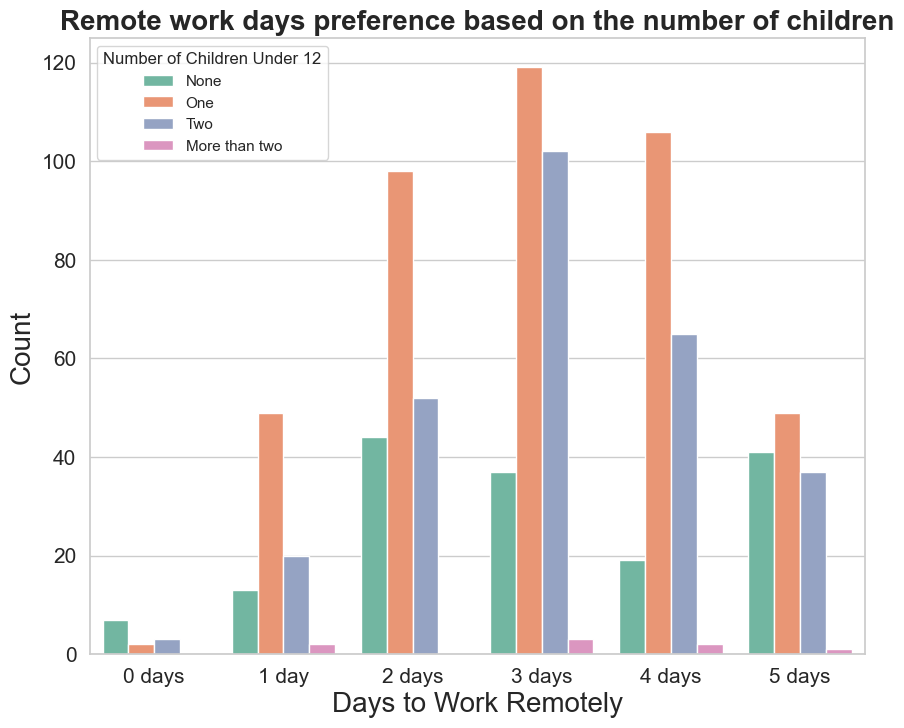

In [69]:

days_order = sorted(data['Days_to_work_remotely'].unique())

custom_palette = sns.color_palette("Set2") 

# Plotting a grouped bar chart with ordered days
plt.figure(figsize=(10, 8))
sns.countplot(x='Days_to_work_remotely', hue='Children_under12', data=data, palette=custom_palette, order=days_order)

# Plotting
plt.title('Remote work days preference based on the number of children',fontweight = 'bold',fontsize=20)
plt.xlabel('Days to Work Remotely',fontsize=20)
plt.ylabel('Count',fontsize=20)
#plt.legend(title='Number of Children Under 12',loc='upper left',bbox_to_anchor=(1.31, 1), ncol=1,fontsize='large')
plt.legend(title='Number of Children Under 12',loc='upper left', ncol=1)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

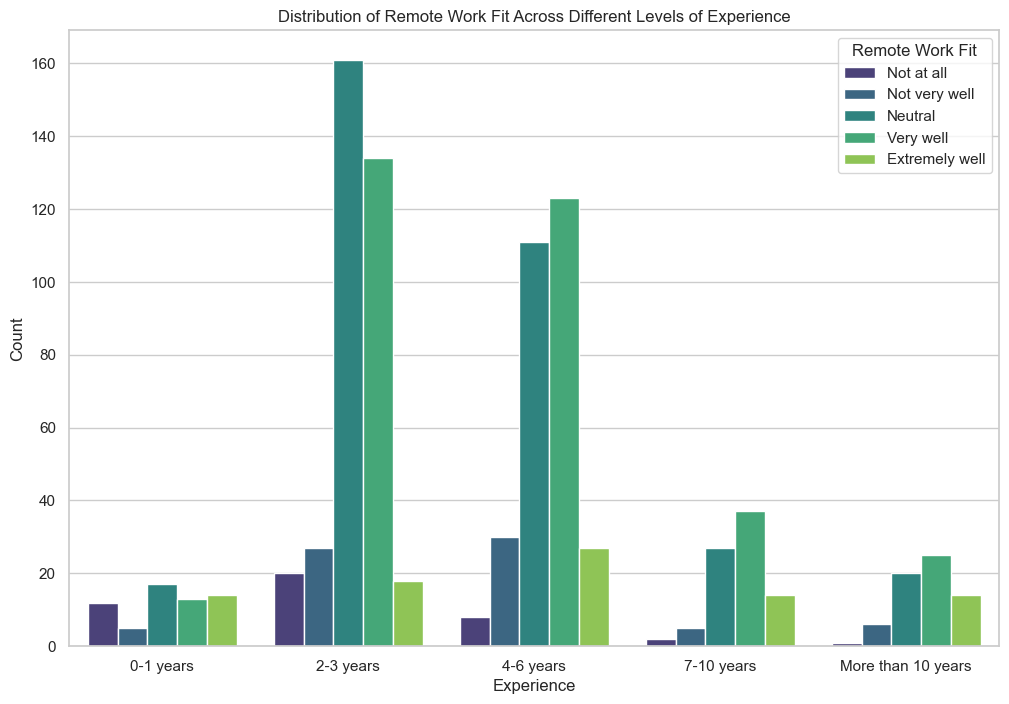

In [70]:
# Extracting relevant columns
data_subset = data[['Experience', 'Remote_work_fit']]

# Ordering the categories for better visualization
experience_order = ['0-1 years', '2-3 years', '4-6 years', '7-10 years', 'More than 10 years']
remote_work_fit_order = ['Not at all', 'Not very well', 'Neutral', 'Very well', 'Extremely well']

# Plotting
plt.figure(figsize=(12, 8))
sns.countplot(x='Experience', hue='Remote_work_fit', data=data_subset,
              order=experience_order, hue_order=remote_work_fit_order, palette='viridis')
plt.title('Distribution of Remote Work Fit Across Different Levels of Experience')
plt.xlabel('Experience')
plt.ylabel('Count')
plt.legend(title='Remote Work Fit', title_fontsize='12')
plt.show()

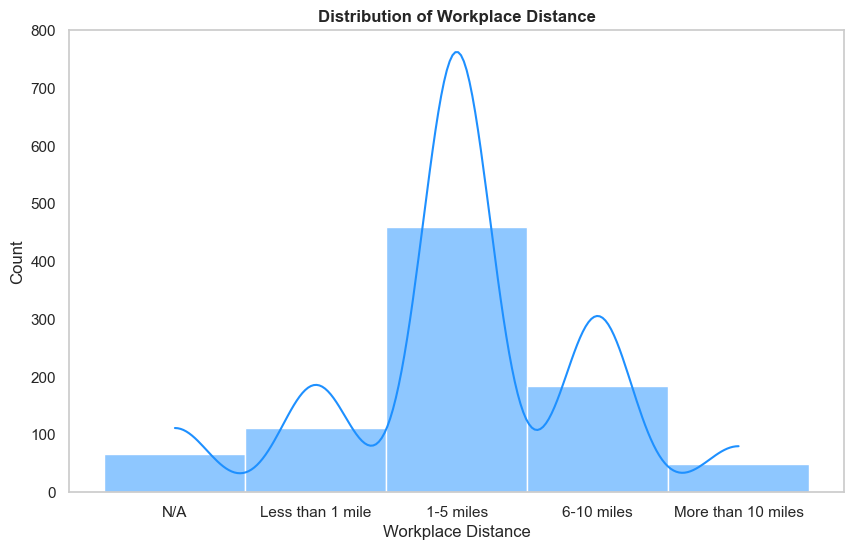

In [71]:
# Defining the order of categories
distance_order = ['N/A', 'Less than 1 mile', '1-5 miles', '6-10 miles', 'More than 10 miles']

# Converting the 'Workplace distance' column to a categorical type with the specified order
data['Workplace distance'] = pd.Categorical(data['Workplace distance'], categories=distance_order, ordered=True)

# Plotting
plt.figure(figsize=(10, 6))
sns.histplot(data['Workplace distance'], bins=20, kde=True, color='dodgerblue')
plt.title('Distribution of Workplace Distance',fontweight='bold')
plt.xlabel('Workplace Distance')
plt.ylabel('Count')
plt.xticks(rotation=0) 
plt.grid(False)
plt.show()

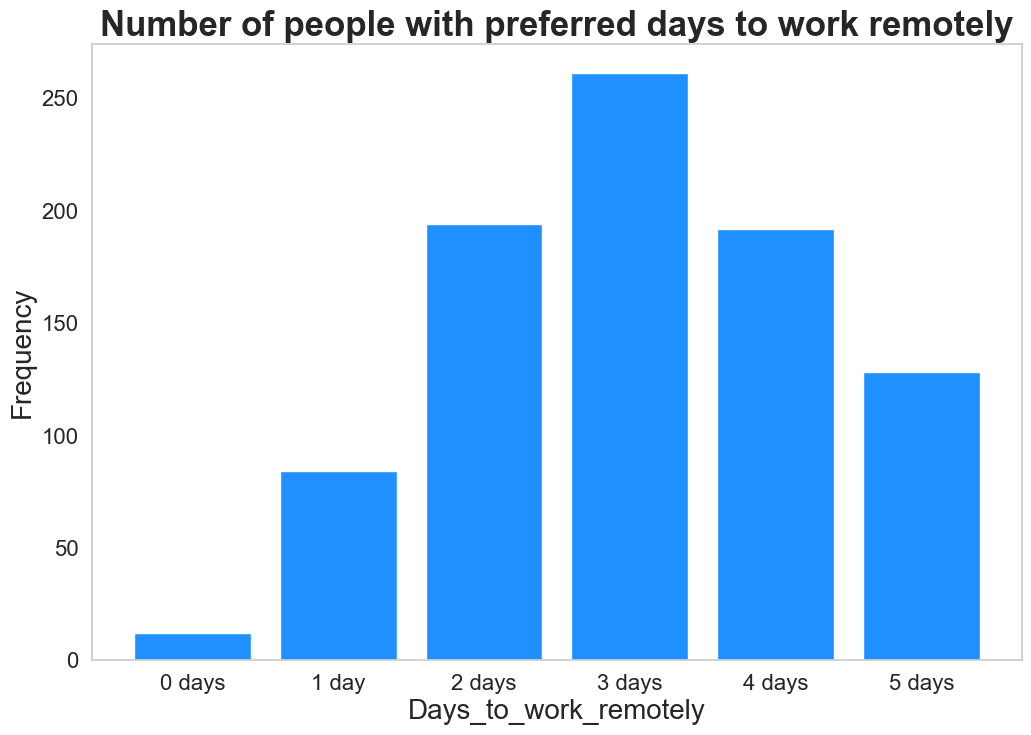

In [72]:
# Counting the frequency of each value
value_counts = data['Days_to_work_remotely'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 8))
plt.bar(value_counts.index, value_counts.values, color='dodgerblue')
plt.title('Number of people with preferred days to work remotely',fontweight = 'bold',fontsize=25)
plt.xlabel('Days_to_work_remotely',fontsize=20)
plt.ylabel('Frequency',fontsize=20)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(False)
plt.show()

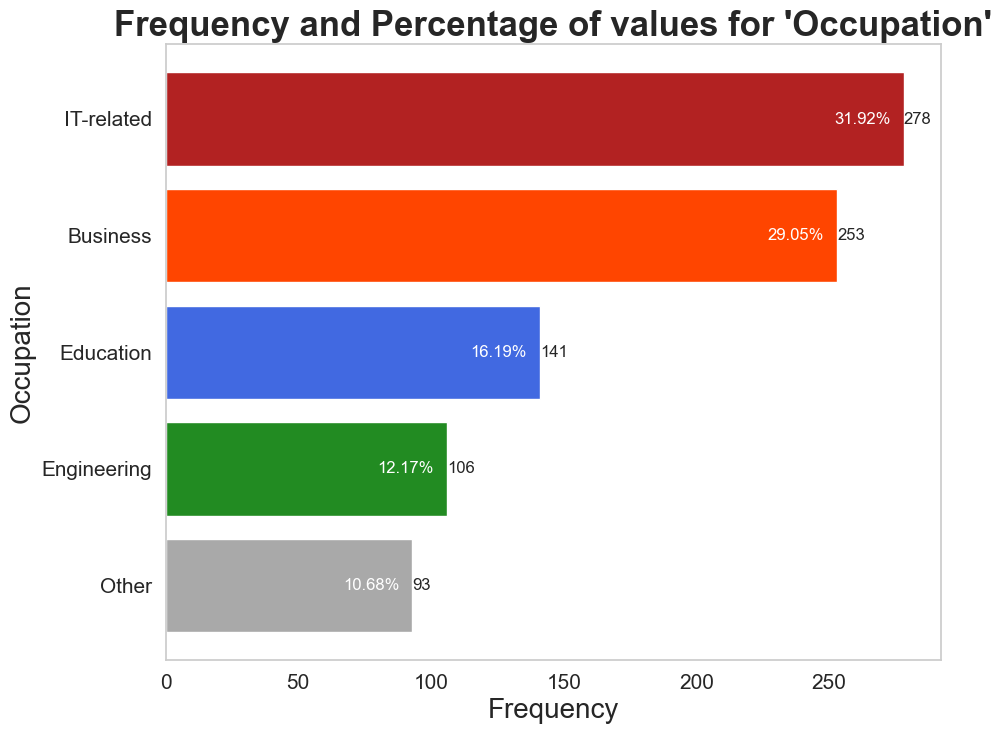

In [73]:
# Bar chart plot for the nominal column 'Occupation'
frequency = data['Occupation'].value_counts()
frequency = frequency.sort_values(ascending=True)

# Calculating the percentage of each category
percentage = (frequency / len(data)) * 100

# Defining color map
color_map = {
    'Business': 'orangered',
    'Education': 'royalblue',
    'Engineering': 'forestgreen',
    'IT-related': 'firebrick',
    'Other': 'darkgrey'
}

plt.figure(figsize=(10, 8))

bars = plt.barh(frequency.index, frequency, color=[color_map[x] for x in frequency.index])

# Adding the frequency annotations on each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(bar.get_width()), va='center', ha='left')

# Adding the percentage annotations on each bar
for bar, percent in zip(bars, percentage):
    plt.text(bar.get_width() - 5, bar.get_y() + bar.get_height() / 2, f'{percent:.2f}%', va='center', ha='right', color='white')


plt.xlabel('Frequency',fontsize = 20)
plt.ylabel('Occupation',fontsize = 20)
plt.title("Frequency and Percentage of values for 'Occupation'", fontweight='bold',fontsize=25)

plt.grid(False)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Show the plot
plt.show()

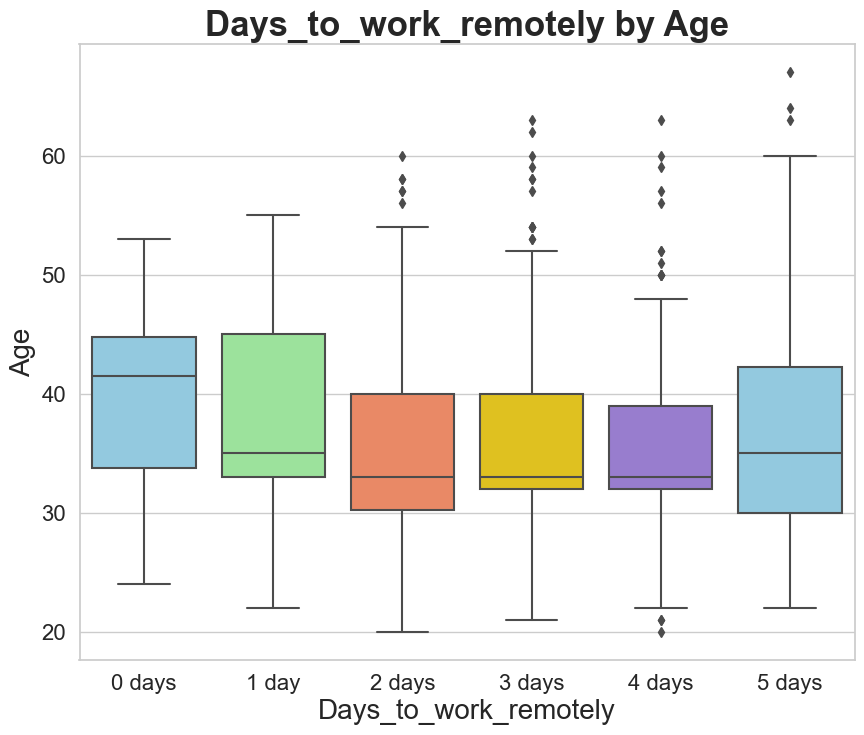

In [74]:
sns.set(style="whitegrid")

# A list of colors for each box plot
boxplot_colors = ['skyblue', 'lightgreen', 'coral', 'gold', 'mediumpurple']
days_order = sorted(data['Days_to_work_remotely'].unique())

plt.figure(figsize=(10, 8))
sns.boxplot(x='Days_to_work_remotely',y='Age', data=data, order=days_order,palette=boxplot_colors)

plt.xlabel('Days_to_work_remotely',fontsize=20)
plt.ylabel('Age',fontsize=20)
plt.title('Days_to_work_remotely by Age',fontweight='bold',fontsize=25)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

## Transforming / Encoding the categorical variables

In [75]:
# Mapping the 'Occupation' column to numerical values based on the above chart
occupation_category = {'Other': 1,'Engineering': 2, 'Education': 3,'Business': 4,'IT-related': 5}
data['Occupation'] = [occupation_category[value] for value in data['Occupation']]

# Mapping the "Workplace distance" column to numerical values in the original dataset
distance_category = {'N/A': 0, 'Less than 1 mile': 1,'1-5 miles': 2 ,'6-10 miles': 3,'More than 10 miles': 4}
#this line of making for loop is called Pythonic way
data['Workplace distance'] = [distance_category[value] for value in data['Workplace distance']] 

# Map the "Experience " column to numerical values in the original dataset
experience_category = {'0-1 years': 1,'2-3 years': 2 ,'4-6 years': 3,'7-10 years': 4,'More than 10 years': 5}
data['Experience'] = [experience_category[value] for value in data['Experience']]

# Mapping the "Number of children " column to numerical values in the original dataset
childrenum_category = {'None': 0,'One': 1,'Two': 2,'More than two': 3}
data['Children_under12'] = [childrenum_category[value] for value in data['Children_under12']]

# Mapping the "Hours worked per day" column to numerical values in the original dataset
workhrs_category = {'Less than 8 hours': 1,'8 hours': 2,'More than 8 hours': 3}
data['Hours_worked'] = [workhrs_category[value] for value in data['Hours_worked']]

# Mapping the "Hours spent per day with family/friends" column to numerical values in the original dataset
leisure_category = {'None': 1,'1 hour': 2,'2 hours': 3,'3 or more hours': 4}
data['Leisure_time_per_day'] = [leisure_category[value] for value in data['Leisure_time_per_day']]

# Map the "Hours of sleep per day" column to numerical values in the original dataset
sleephrs_category = {'Less than 6 hours': 1,'6-8 hours': 2,'More than 8 hours': 3}
data['Hours_of_sleep'] = [sleephrs_category[value] for value in data['Hours_of_sleep']]

# Mapping the "Remote job stress" column to numerical values in the original dataset
stress_category = {'N/A': 0, 'Little or no stress': 1,'Moderately stressful': 2 ,'Extremely stressful': 3}
data['Job_stress(Remote)'] = [stress_category[value] for value in data['Job_stress(Remote)']]

#Effect on professional growth
prof_growth = {'N/A':0, 'No': 1, 'Yes': 2}
data['Profession_impact'] = [prof_growth[value] for value in data['Profession_impact']]

# Mapping the "Productivity" column to numerical values in the original dataset
productivity_category = {'N/A': 0, 'Not productive': 1,'Less productive': 2,
                         'Productive': 3,'Very productive': 4, 'Extremely productive': 5}
data['Remotework_Productivity'] = [productivity_category[value] for value in data['Remotework_Productivity']]

# Able to Save money
save_money = {'N/A':0, 'No': 1, 'Yes': 2}
data['Remotework_Savings'] = [save_money[value] for value in data['Remotework_Savings']]

# Mapping the "Work_life balance" column to numerical values in the original dataset
work_life_category = {'Extremely dissatisfied': 1, 'Dissatisfied': 2, 
                      'Neither satisfied nor dissatisfied': 3, 'Satisfied': 4, 'Extremely satisfied': 5}
data['Work-Life balance satisfaction'] = [work_life_category[value] for value in data['Work-Life balance satisfaction']]

# Mapping the "Inperson meeting" column to numerical values in the original dataset
Inperson_category = {'Not important': 1, 'Slightly important': 2,'Important': 3, 
                     'Very important': 4, 'Extremely important': 5}
data['Inperson_meeting_importance'] = [Inperson_category[value] for value in data['Inperson_meeting_importance']]

# Mapping the "Paycut amount" column to numerical values in the original dataset
paycut_category = {'N/A': 0, 'Less than 5%': 1, '5-10%': 2,'11-15%': 3,'More than 15%': 4}
data['Pay_cut_Amount'] = [paycut_category[value] for value in data['Pay_cut_Amount']]

# Mapping the "Remote work alignment with preference" column to numerical values in the original dataset
remote_alignment_category = {'Not at all': 1, 'Not very well': 2, 
                      'Neutral': 3, 'Very well': 4, 'Extremely well': 5}
data['Remote_work_fit'] = [remote_alignment_category[value] for value in data['Remote_work_fit']]

# Mapping the "Days to work remotely" column to numerical values in the original dataset
remote_workdays_category = {'0 days': 0, '1 day': 1, 
                      '2 days': 2, '3 days': 3, '4 days': 4, '5 days': 5}
data['Days_to_work_remotely'] = [remote_workdays_category[value] for value in data['Days_to_work_remotely']]

In [76]:
data.head()

,Random ID,Age,Gender,Occupation,Location,Workplace distance,Experience,Children_under12,Hours_worked,Leisure_time_per_day,...,Profession_impact,Remotework_Productivity,Remotework_Savings,Work-Life balance satisfaction,Inperson_meeting_importance,Remote_Work_Opportunities,Pay_cut_for_remotework,Pay_cut_Amount,Remote_work_fit,Days_to_work_remotely
0,1449,20,Female,3,No,0,2,0,1,2,...,2,2,1,3,2,Yes,Yes,1,2,2
1,1510,24,Female,4,No,0,2,1,1,2,...,0,0,0,3,3,Yes,No,0,2,2
2,1465,25,Female,4,Yes,2,2,1,2,2,...,2,5,2,5,5,Yes,Yes,2,4,1
3,1784,28,Male,4,Yes,3,4,2,3,4,...,2,4,2,4,5,Yes,Yes,4,5,5
4,1733,24,Female,4,Yes,2,2,2,1,2,...,2,3,2,4,3,Yes,Yes,2,3,2


## Transforming the binary columns

In [77]:
#For the 'Gender' column
gender_dummies = {'Male': 1, 'Female': 0}
data['Gender'] = [gender_dummies[value] for value in data['Gender']]

#For the 'Location' column
Location_dummies = {'Yes': 1, 'No': 0}
data['Location'] = [Location_dummies[value] for value in data['Location']]

#Remote work engagement
Remote_dummies = {'Yes': 1, 'No': 0}
data['Remote_work_frequency'] = [Remote_dummies[value] for value in data['Remote_work_frequency']]

#Remote job opportunities
remote_job_dummies = {'Yes': 1, 'No': 0}
data['Remote_Work_Opportunities'] = [remote_job_dummies[value] for value in data['Remote_Work_Opportunities']]

#For the 'Pay_cut_for_remotework' column
pay_cut_dummies = {'Yes': 1, 'No': 0}
data['Pay_cut_for_remotework'] = [pay_cut_dummies[value] for value in data['Pay_cut_for_remotework']]

In [78]:
data.head()

,Random ID,Age,Gender,Occupation,Location,Workplace distance,Experience,Children_under12,Hours_worked,Leisure_time_per_day,...,Profession_impact,Remotework_Productivity,Remotework_Savings,Work-Life balance satisfaction,Inperson_meeting_importance,Remote_Work_Opportunities,Pay_cut_for_remotework,Pay_cut_Amount,Remote_work_fit,Days_to_work_remotely
0,1449,20,0,3,0,0,2,0,1,2,...,2,2,1,3,2,1,1,1,2,2
1,1510,24,0,4,0,0,2,1,1,2,...,0,0,0,3,3,1,0,0,2,2
2,1465,25,0,4,1,2,2,1,2,2,...,2,5,2,5,5,1,1,2,4,1
3,1784,28,1,4,1,3,4,2,3,4,...,2,4,2,4,5,1,1,4,5,5
4,1733,24,0,4,1,2,2,2,1,2,...,2,3,2,4,3,1,1,2,3,2


In [79]:
# Summary of the data after normalization
data.describe()

,Random ID,Age,Gender,Occupation,Location,Workplace distance,Experience,Children_under12,Hours_worked,Leisure_time_per_day,...,Profession_impact,Remotework_Productivity,Remotework_Savings,Work-Life balance satisfaction,Inperson_meeting_importance,Remote_Work_Opportunities,Pay_cut_for_remotework,Pay_cut_Amount,Remote_work_fit,Days_to_work_remotely
count,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,...,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000
mean,2402.629162,36.149254,0.624569,3.593571,0.923077,2.039036,2.695752,1.153846,1.955224,2.924225,...,1.594719,2.765786,1.725603,3.654420,3.127440,0.854191,0.752009,1.586682,3.398393,3.057405
std,845.867817,8.482883,0.484512,1.328781,0.266622,0.931365,1.001364,0.720301,0.556316,0.855677,...,0.678009,1.334864,0.646315,0.946245,0.987772,0.353118,0.432095,1.081296,0.950957,1.240657
min,1401.000000,20.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1624.500000,32.000000,0.000000,3.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,...,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000,1.000000,1.000000,3.000000,2.000000
50%,1843.000000,33.000000,1.000000,4.000000,1.000000,2.000000,3.000000,1.000000,2.000000,3.000000,...,2.000000,3.000000,2.000000,4.000000,3.000000,1.000000,1.000000,2.000000,3.000000,3.000000
75%,3289.500000,40.500000,1.000000,5.000000,1.000000,3.000000,3.000000,2.000000,2.000000,4.000000,...,2.000000,4.000000,2.000000,4.000000,4.000000,1.000000,1.000000,2.000000,4.000000,4.000000
max,3990.000000,67.000000,1.000000,5.000000,1.000000,4.000000,5.000000,3.000000,3.000000,4.000000,...,2.000000,5.000000,2.000000,5.000000,5.000000,1.000000,1.000000,4.000000,5.000000,5.000000


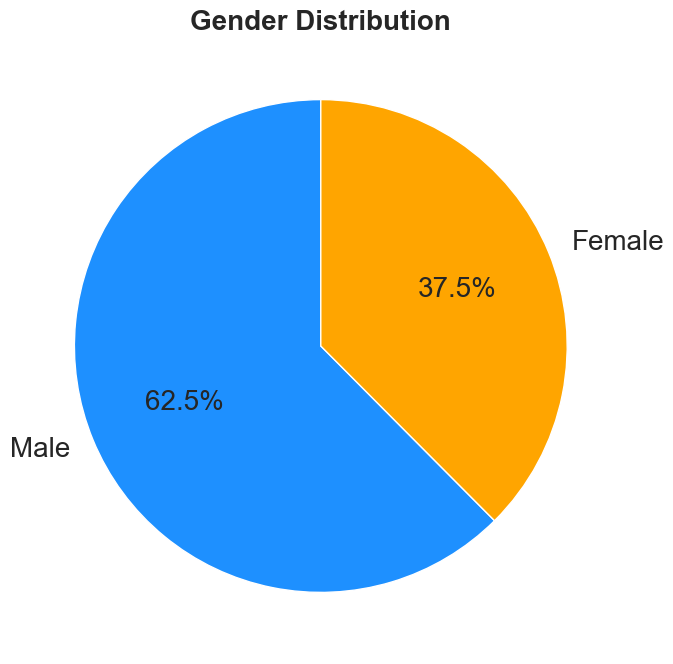

In [80]:
# Replacing numeric values with labels
data['Gender'] = data['Gender'].replace({0: 'Female', 1: 'Male'})

# Counting the occurrences of each gender
gender_counts = data['Gender'].value_counts()

# Creating a pie chart
plt.figure(figsize=(10, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 20},
colors=['dodgerblue', 'orange'])

# Set title
plt.title('Gender Distribution',fontweight='bold',fontsize=20)

# Show the plot
plt.show()

In [81]:

# Creating a cross-tabulation table
cross_tab = pd.crosstab(data['Inperson_meeting_importance'], data['Days_to_work_remotely'])

# Performing the chi-square test
chi2, p, _, _ = chi2_contingency(cross_tab)

print("Cross-tabulation table:")
print(cross_tab)

# chi-square test results
print("\nChi-square value:", chi2)
print("P-value:", p)

# Define the significance level
alpha = 0.05

# Stating the null and alternative hypotheses
print("\nHypotheses:")
print("H0: There is no association between In-person Meeting Importance and Days to Work Remotely.")
print("Ha: There is an association between In-person Meeting Importance and Days to Work Remotely.")

# Check the p-value against the significance level
if p < alpha:
    print("\nConclusion: Reject the null hypothesis. There is evidence of an association.")
else:
    print("\nConclusion: Fail to reject the null hypothesis. There is no significant evidence of an association.")


Cross-tabulation table:
Days_to_work_remotely        0   1   2    3   4   5
Inperson_meeting_importance                        
1                            1   4  13    6   5  27
2                            4  24  34   47  23  17
3                            2  38  79  119  83  32
4                            4  11  62   78  69  30
5                            1   7   6   11  12  22

Chi-square value: 118.66689131951713
P-value: 5.031701347973983e-16

Hypotheses:
H0: There is no association between In-person Meeting Importance and Days to Work Remotely.
Ha: There is an association between In-person Meeting Importance and Days to Work Remotely.

Conclusion: Reject the null hypothesis. There is evidence of an association.


## Feature Selection

In [82]:
# Using Chi-squared (X2) to determine the columns highly related to the target variable
significance_level = 0.01 

significant_features = []  

categorical_features = data.columns
for categorical_feature in categorical_features:
    contingency_table = pd.crosstab(data[categorical_feature], data['Days_to_work_remotely'])
    #chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    if p < significance_level:
        significant_features.append(categorical_feature)
    
    print(f"Chi-squared test for {categorical_feature}:")
    print(f"Chi-squared statistic: {chi2}")
    print(f"P-value: {p}")
    print("\n")

print("Features having a strong relationship with 'Days_to_work_remotely':")
print(significant_features)
print("\n Expected Frequencies")
print(expected)

Chi-squared test for Random ID:
Chi-squared statistic: 2874.6407789732148
P-value: 0.29706811826357776


Chi-squared test for Age:
Chi-squared statistic: 274.5612009557072
P-value: 0.0072659217942388195


Chi-squared test for Gender:
Chi-squared statistic: 18.555766028492013
P-value: 0.002324779610150732


Chi-squared test for Occupation:
Chi-squared statistic: 67.26906706438055
P-value: 5.051912427866177e-07


Chi-squared test for Location:
Chi-squared statistic: 20.80407809187831
P-value: 0.0008820807056271346


Chi-squared test for Workplace distance:
Chi-squared statistic: 59.71454485493872
P-value: 7.883588059551541e-06


Chi-squared test for Experience:
Chi-squared statistic: 94.15209907441408
P-value: 1.3809767755073272e-11


Chi-squared test for Children_under12:
Chi-squared statistic: 57.19020399825188
P-value: 7.618715380227068e-07


Chi-squared test for Hours_worked:
Chi-squared statistic: 49.08053336140124
P-value: 3.9371340531954393e-07


Chi-squared test for Leisure_time_

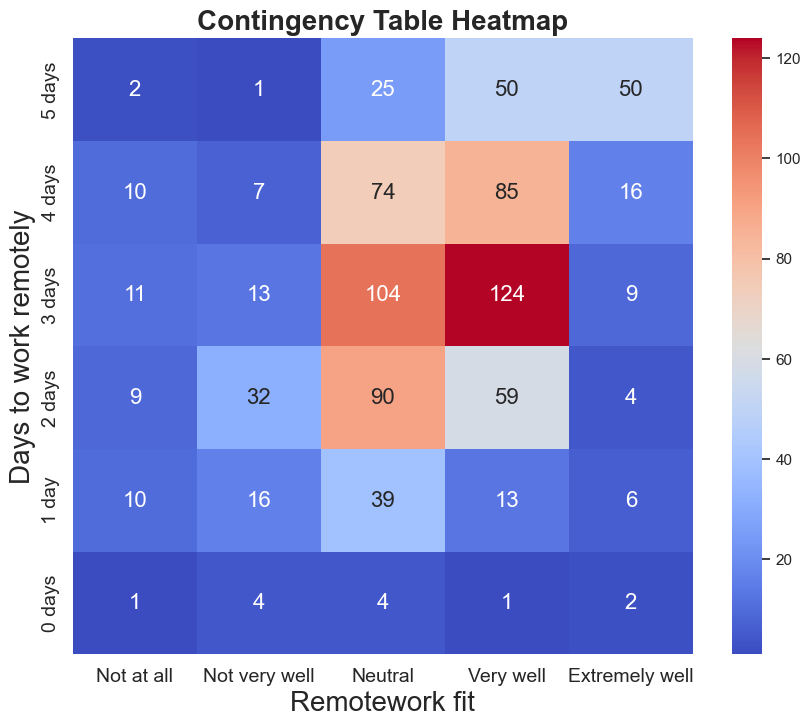

In [50]:
# Defining the desired order for 'Remote_work_fit'
x_order = ['Not at all','Not very well', 'Neutral', 'Very well', 'Extremely well']
contingency_table = pd.crosstab(data['Days_to_work_remotely'], data['Remote_work_fit'])

# Reorder only the columns
contingency_table = contingency_table[x_order]

# Ensuring the order of the rows (y-axis) is not reversed
contingency_table = contingency_table.reindex(index=contingency_table.index[::-1])

plt.figure(figsize=(10, 8))

sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='g', cbar=True, annot_kws={'size': 16})

plt.xlabel('Remotework fit', fontsize=20)
plt.ylabel('Days to work remotely', fontsize=20)

plt.title('Contingency Table Heatmap', fontweight='bold', fontsize=20)

# Adjusting the font size of the values on the axes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

In [51]:
data={ 
    "0": [1,  10,  9,  11,  10,  2],
    "1": [4,  16,  32, 13,  7,   1],
    "2": [4,  39,  90, 104, 74,  25],
    "3": [1,  13,  59, 124, 85,  50],
    "4": [2,  6,   4,   9,  16,  50]
}

df = pd.DataFrame(data)

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(df)

print("Chi-squared statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)

#Pearson's correlation coefficient
pearson_corr, _ = pearsonr(df['0'], df['1'])
print("Pearson's correlation coefficient:", pearson_corr)

#Kendall's Tau
kendall_tau, _ = kendalltau(df['0'], df['1'])
print("Kendall's Tau:", kendall_tau)

Chi-squared statistic: 240.12612308596258
p-value: 1.1110294618313881e-39
Degrees of freedom: 20
Expected frequencies:
[[  0.5924225    1.00574053   4.62916188   4.57405281   1.19862227]
 [  4.14695752   7.0401837   32.40413318  32.01836969   8.39035591]
 [  9.57749713  16.25947187  74.83811711  73.94718714  19.37772675]
 [ 12.88518944  21.87485649 100.68427095  99.48564868  26.07003444]
 [  9.47876005  16.09184845  74.06659013  73.18484501  19.17795637]
 [  6.31917336  10.72789897  49.37772675  48.78989667  12.78530425]]
Pearson's correlation coefficient: 0.5778721736336614
Kendall's Tau: 0.2760262237369417


r = 0.5779 indicates that there is a moderate positive linear relationship between the two variables.
Tau = 0.2760 also indicates there is a positive correlation, but it's not as strong as the positive correlation suggested by Pearson's r.

All in all, a positive correlation exists between the two variables.

In chi-squared test there is the "rule of 5", where each expected frequency should be 5 or more.In this case, most of the frequecies are above 5 except for few. They need some correction

The choice of 'Remote_work_fit' is strongly related to the choice of 'Days to work remotely' based on the result.

In [53]:
data = {
    '0': [1, 4, 4, 1, 2],
    '1': [10, 16, 39, 13, 6],
    '2': [9, 32, 90, 59, 4],
    '3': [11, 13, 104, 124, 9],
    '4': [10, 7, 74, 85, 16],
    '5': [2, 1, 25, 50, 50],
}

df = pd.DataFrame(data)

df.columns = ['Days_to_work_remotely_0', 'Days_to_work_remotely_1', 'Days_to_work_remotely_2',
              'Days_to_work_remotely_3', 'Days_to_work_remotely_4', 'Days_to_work_remotely_5']

# Combining columns 0 and 1
df['Days_to_work_remotely_combined'] = df['Days_to_work_remotely_0'] + df['Days_to_work_remotely_1']

# Dropping the original columns 0 and 1 if needed
#df = df.drop(['Days_to_work_remotely_0', 'Days_to_work_remotely_1'], axis=1)

print(df)

   Days_to_work_remotely_0  Days_to_work_remotely_1  Days_to_work_remotely_2  \
0                        1                       10                        9   
1                        4                       16                       32   
2                        4                       39                       90   
3                        1                       13                       59   
4                        2                        6                        4   

   Days_to_work_remotely_3  Days_to_work_remotely_4  Days_to_work_remotely_5  \
0                       11                       10                        2   
1                       13                        7                        1   
2                      104                       74                       25   
3                      124                       85                       50   
4                        9                       16                       50   

   Days_to_work_remotely_combined  
0 

In [55]:
contingency_table_combined = df[['Days_to_work_remotely_combined', 'Days_to_work_remotely_2', 'Days_to_work_remotely_3',
                                 'Days_to_work_remotely_4', 'Days_to_work_remotely_5']]

chi2, p, dof, expected = chi2_contingency(contingency_table_combined)

print("Chi-squared statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)

Chi-squared statistic: 235.73730698823135
p-value: 4.3052543912274004e-41
Degrees of freedom: 16
Expected frequencies:
[[  4.73938002   9.57749713  12.88518944   9.47876005   6.31917336]
 [  8.04592423  16.25947187  21.87485649  16.09184845  10.72789897]
 [ 37.03329506  74.83811711 100.68427095  74.06659013  49.37772675]
 [ 36.5924225   73.94718714  99.48564868  73.18484501  48.78989667]
 [  9.58897819  19.37772675  26.07003444  19.17795637  12.78530425]]


# Machine Learning

## i/ Ordinal Logistic Regression

In [83]:
X = data[['Age', 'Workplace distance', 'Experience', 'Children_under12', 'Hours_worked', 'Leisure_time_per_day', 
            'Remote_work_frequency', 'Job_stress(Remote)', 'Profession_impact', 'Remotework_Productivity', 'Remotework_Savings',
             'Work-Life balance satisfaction', 'Inperson_meeting_importance', 'Remote_Work_Opportunities', 
             'Pay_cut_for_remotework', 'Pay_cut_Amount', 'Remote_work_fit']]

y = data['Days_to_work_remotely']

#y = pd.Categorical(y, ordered=True)
ordinal_model = sm.MNLogit(y, X).fit()
print(ordinal_model.summary())

Optimization terminated successfully.
         Current function value: 1.417545
         Iterations 9
                            MNLogit Regression Results                           
Dep. Variable:     Days_to_work_remotely   No. Observations:                  871
Model:                           MNLogit   Df Residuals:                      786
Method:                              MLE   Df Model:                           80
Date:                   Tue, 12 Dec 2023   Pseudo R-squ.:                  0.1115
Time:                           21:19:48   Log-Likelihood:                -1234.7
converged:                          True   LL-Null:                       -1389.5
Covariance Type:               nonrobust   LLR p-value:                 9.252e-29
       Days_to_work_remotely=1       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Age                                0.0459   

## Splitting the dataset into training, validation, and testing sets for a better model performace

In [84]:
# Splitting the data into training and the rest (validation + testing)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Splitting the rest into validation and testing
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [85]:
X_train.shape, X_val.shape, X_test.shape

((609, 17), (131, 17), (131, 17))

## ii/ Decision Trees

In [86]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = dt_classifier.predict(X_val)

accuracy = accuracy_score(y_val, y_val_pred)
print("Accuracy:", accuracy)

Accuracy: 0.366412213740458


### To check if there is overfitting

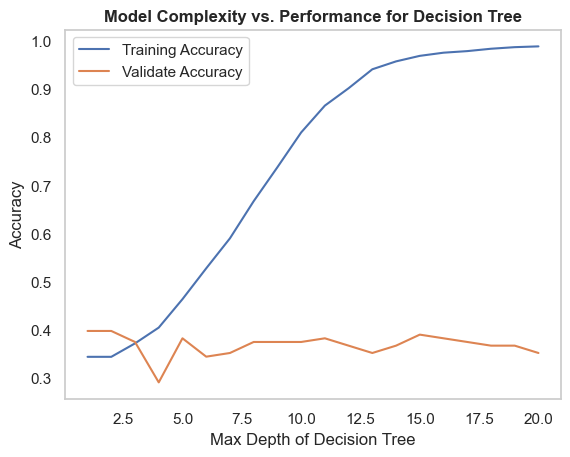

In [87]:
max_depths = range(1, 21)
train_accuracies = []
val_accuracies = []

# Training decision trees with different max depths
for depth in max_depths:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree.fit(X_train, y_train)
    y_train_pred = tree.predict(X_train)
    y_val_pred = tree.predict(X_val)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    
plt.plot(max_depths, train_accuracies, label="Training Accuracy")
plt.plot(max_depths, val_accuracies, label="Validate Accuracy")
plt.xlabel("Max Depth of Decision Tree")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Model Complexity vs. Performance for Decision Tree",fontweight='bold')
plt.grid(False)
plt.show()

In [88]:
max_depth_value = 5
dt_classifier = DecisionTreeClassifier(max_depth=max_depth_value)
dt_classifier.fit(X_train, y_train)

y_val_pred = dt_classifier.predict(X_val)

accuracy = accuracy_score(y_val, y_val_pred)
print("Accuracy:", accuracy)

#Recall(Sensitivity)
recall_dt = recall_score(y_val, y_val_pred, average = 'weighted')

precision_dt = precision_score(y_val, y_val_pred, average = 'weighted')

f1_dt = f1_score(y_val, y_val_pred, average = 'weighted')

cm_dt = confusion_matrix(y_val, y_val_pred)

print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1-Score:", f1_dt)
print("Confusion matrix:\n",cm_dt)

Accuracy: 0.37404580152671757
Precision: 0.48102012491325463
Recall: 0.37404580152671757
F1-Score: 0.3823754698441401
Confusion matrix:
 [[ 0  0  0  1  0  0]
 [ 0  2  5  2  2  0]
 [ 0  1 13 11  8  0]
 [ 0  0 10 18 12  0]
 [ 1  0  5  9  9  0]
 [ 0  0  3  3  9  7]]


The accuracy has improved a little bit

## iii/ Random Forest Classifier

In [89]:
rf_classifier = RandomForestClassifier()

rf_classifier.fit(X_train, y_train)

#Making Predictions
y_val_pred = rf_classifier.predict(X_val)

In [90]:
accuracy = accuracy_score(y_val, y_val_pred)

precision = precision_score(y_val, y_val_pred, average = 'weighted')

#roc_auc = roc_auc_score(y_val, y_val_pred)

cm = confusion_matrix(y_val, y_val_pred)

#Recall(Sensitivity)
recall = recall_score(y_val, y_val_pred, average = 'weighted')

f1 = f1_score(y_val, y_val_pred, average = 'weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Confusion matrix:\n",cm)

Accuracy: 0.3969465648854962
Precision: 0.4510371097066844
Recall: 0.3969465648854962
F1-Score: 0.3962477014749789
Confusion matrix:
 [[ 0  0  0  1  0  0]
 [ 0  3  7  0  1  0]
 [ 0  5 15 10  3  0]
 [ 1  0 10 20  8  1]
 [ 0  1  1 14  8  0]
 [ 0  0  4  4  8  6]]


## iv/ XGBoost

In [91]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_val, label=y_val)

# Defining XGBoost parameters for multiclass classification
params = {
    'objective': 'multi:softmax',
    'num_class': 6,  
    'eval_metric': 'mlogloss'  
}

# Training the XGBoost model
num_round = 100 
bst = xgb.train(params, dtrain, num_round)

In [92]:
predictions = bst.predict(dtest)

#Accuracy
accuracy = accuracy_score(y_val, predictions)
print(f"Accuracy: {accuracy:.2f}")

#Classification report
report = classification_report(y_val, predictions)
print(report)

# Confusion matrix
cm = confusion_matrix(y_val, predictions)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.35
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.33      0.27      0.30        11
           2       0.34      0.33      0.34        33
           3       0.34      0.38      0.36        40
           4       0.22      0.29      0.25        24
           5       0.71      0.45      0.56        22

    accuracy                           0.35       131
   macro avg       0.33      0.29      0.30       131
weighted avg       0.38      0.35      0.36       131

Confusion Matrix:
[[ 0  0  0  1  0  0]
 [ 0  3  4  1  3  0]
 [ 0  4 11 10  6  2]
 [ 0  2 11 15 11  1]
 [ 0  0  4 12  7  1]
 [ 0  0  2  5  5 10]]


C:\Users\Nahom\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nahom\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nahom\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## K-means Clustering Analysis

In [93]:
data= data.drop('Random ID',axis=1)

In [94]:
data.head()

,Age,Gender,Occupation,Location,Workplace distance,Experience,Children_under12,Hours_worked,Leisure_time_per_day,Hours_of_sleep,...,Profession_impact,Remotework_Productivity,Remotework_Savings,Work-Life balance satisfaction,Inperson_meeting_importance,Remote_Work_Opportunities,Pay_cut_for_remotework,Pay_cut_Amount,Remote_work_fit,Days_to_work_remotely
0,20,Female,3,0,0,2,0,1,2,1,...,2,2,1,3,2,1,1,1,2,2
1,24,Female,4,0,0,2,1,1,2,2,...,0,0,0,3,3,1,0,0,2,2
2,25,Female,4,1,2,2,1,2,2,2,...,2,5,2,5,5,1,1,2,4,1
3,28,Male,4,1,3,4,2,3,4,2,...,2,4,2,4,5,1,1,4,5,5
4,24,Female,4,1,2,2,2,1,2,1,...,2,3,2,4,3,1,1,2,3,2


In [96]:
selected_features=['Age',
                   'Remotework_Productivity','Pay_cut_Amount','Workplace distance',
                   'Remote_work_fit', 'Days_to_work_remotely']

print(selected_features)
new_data = data[selected_features].copy()
new_data.head()

['Age', 'Remotework_Productivity', 'Pay_cut_Amount', 'Workplace distance', 'Remote_work_fit', 'Days_to_work_remotely']


,Age,Remotework_Productivity,Pay_cut_Amount,Workplace distance,Remote_work_fit,Days_to_work_remotely
0,20,2,1,0,2,2
1,24,0,0,0,2,2
2,25,5,2,2,4,1
3,28,4,4,3,5,5
4,24,3,2,2,3,2


C:\Users\Nahom\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


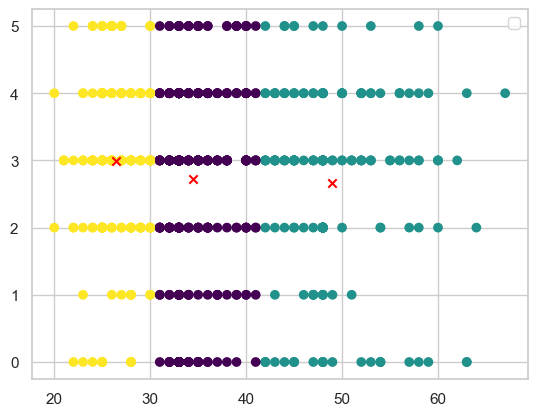

In [97]:
k = 3  
kmeans = KMeans(n_clusters=k)
kmeans.fit(new_data) 
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
X_array = new_data.to_numpy()  

#Using NumPy-style indexing to access the columns
plt.scatter(X_array[:, 0], X_array[:, 1], c=labels, cmap='viridis')

#plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
plt.legend()
plt.show()

In [98]:
kmeans = KMeans(3)
kmeans.fit(new_data)
centroids = kmeans.cluster_centers_
pd.DataFrame(centroids,columns=new_data.columns).T

C:\Users\Nahom\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,0,1,2
Age,34.474684,48.913043,26.421053
Remotework_Productivity,2.717300,2.666667,2.994737
Pay_cut_Amount,1.582278,1.454106,1.742105
Workplace distance,2.052743,1.951691,2.100000
Remote_work_fit,3.415612,3.376812,3.378947
Days_to_work_remotely,3.046414,2.985507,3.163158


From the above table we can see that the average value of "Days_to_work_remotely" is 3 days for each cluster

In [101]:
data[labels==1][selected_features]

,Age,Remotework_Productivity,Pay_cut_Amount,Workplace distance,Remote_work_fit,Days_to_work_remotely
8,45,3,2,3,3,3
9,42,3,2,2,3,4
12,48,3,2,2,5,4
25,52,4,2,2,4,4
38,45,3,2,2,3,1
...,...,...,...,...,...,...
843,44,4,2,2,5,5
853,43,4,2,2,4,3
855,43,4,3,2,4,3
856,43,2,2,2,2,1
